In [1]:
# Importamos las librerias necesarias

import pandas as pd
import numpy as np
import sqlite3
import jsonlines
import requests
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Estas librerias esta en el requirements


# 1. Descarga de datos

In [2]:

# Descargamos los datasets de vinos tintos y blancos

# Defino urls, path con nombres de ficheros csv
red_wine_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
white_wine_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"

red_wine_path = "winequality-red.csv"
white_wine_path = "winequality-white.csv"


# Creo una función para llamar a cada dataset y descargar los archivos si no existen
def download_file(url, path):
    # Compruebo si no existen
    if not os.path.exists(path):
        # Descargo el fichero
        response = requests.get(url)
        # Guardo en el fichero definido
        with open(path, 'wb') as file:
            file.write(response.content)
        print(f"Descargado {path}")
    else:
        # Si ya existe el fichero, no lo descargo e informo
        print(f"{path} ya existe")

# Llamo a la función para cada uno de los datasets
download_file(red_wine_url, red_wine_path)
download_file(white_wine_url, white_wine_path)


Descargado winequality-red.csv
Descargado winequality-white.csv


# 2. Combinar los datos

In [3]:
# Cargamos y unificamos los datos

# Leo los ficheros csv descargados
red_df = pd.read_csv(red_wine_path, sep=';')
white_df = pd.read_csv(white_wine_path, sep=';')

# Les añadimos a cada dataframe una columna para indicar el tipo de vino
red_df['type_wine'] = 'red'
white_df['type_wine'] = 'white'

# Juntamos los dos dataframes
df = pd.concat([red_df, white_df], ignore_index=True)

# Añadimos el indice como identificador de cada vino
df['id_wine'] = df.index.astype(str)

# Comprobamos las filas y columnas del dataframe resultante, mostramos los tipos de sus columnas y mostramos 10 registros en pantalla
print("Total de registros y columnas:", df.shape[0], "|", df.shape[1] )
print(df.dtypes)
df.head(10)




Total de registros y columnas: 6497 | 14
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
type_wine                object
id_wine                  object
dtype: object


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_wine,id_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,red,6
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,red,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,red,8
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red,9


# 3. Filtrar atípicos y manejar datos ausentes

In [4]:
# Función para encontrar valores nulos o na en el dataframe
def check_missing_values(df):
    # Comproboamos valors nulos o na y los sumamos
    missing_values = df.isnull().sum() + df.isna().sum()

    # Informamos del resultado de búsqueda de valores perdidos
    print("Valores nulos o na encontrados en cada columna:\n")
    print(missing_values)
    if len(missing_values[missing_values>0])==0:
        print("\nNo hay valores nulos")
    else:
        print(missing_values[missing_values > 0])

# Llamamos a la función y pasamos nuestro dataframe
check_missing_values(df)

# Vamos a ver la distribución de los datos de cada columna del dataframe
df.describe().T

Valores nulos o na encontrados en cada columna:

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type_wine               0
id_wine                 0
dtype: int64

No hay valores nulos


,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


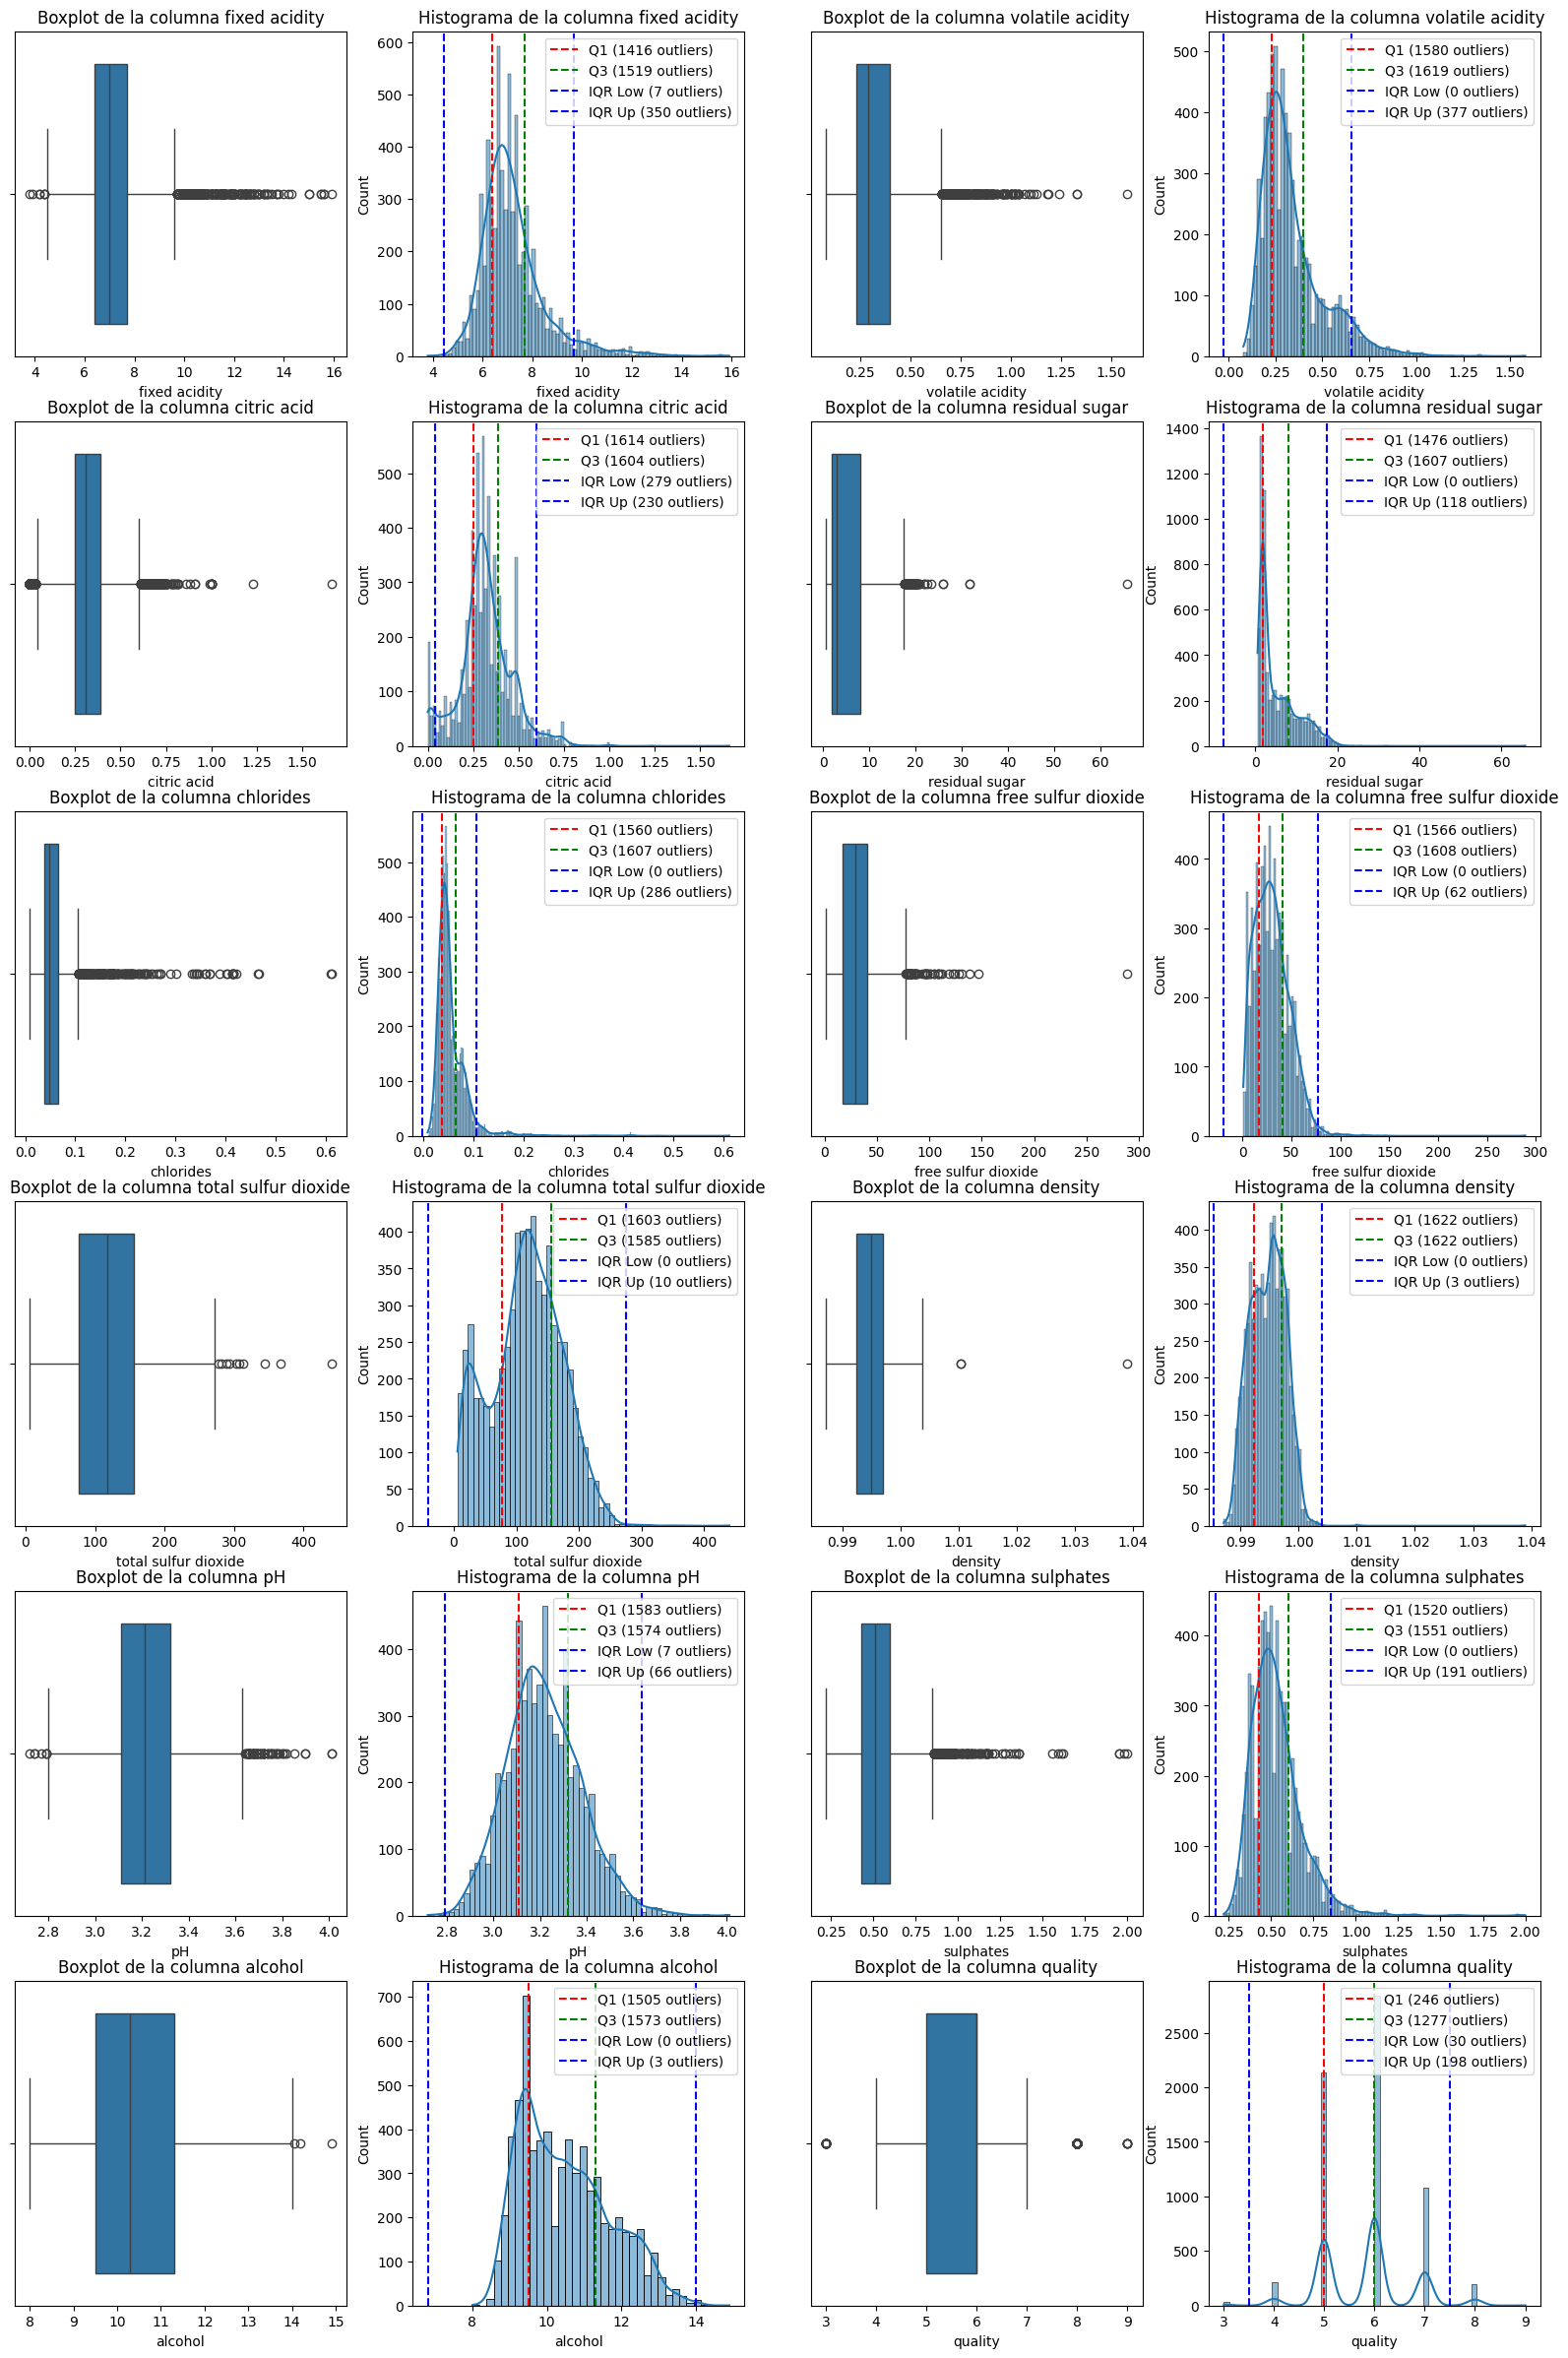

Dataframe después de eliminar outliers en columnas seleccionadas se queda (6481, 14):



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_wine,id_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white,6492
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white,6493
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white,6494
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white,6495


In [5]:
# Función para identificar outliers usando IQR
def identify_outliers(df):
    # Filtramos solo columnas numéricas
    numeric_df = df.select_dtypes(include=[np.number])

    # Calculamos los cuartiles 25 y 75 para luego calcular el Rango Intercuartilico IQR
    Q1 = numeric_df.quantile(0.25)
    Q3 = numeric_df.quantile(0.75)
    IQR = Q3 - Q1
    # Aplicamos la regla de que los outliers son los que superan 1,5 el rango intercuartilico
    outliers = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR)))

    # Devolvemos los outliers, el Q1, Q3 y el IQR
    return outliers, Q1, Q3, IQR

# Llamos a la función para identificar los outliers en el dataframe
outliers, Q1, Q3, IQR  = identify_outliers(df)
#print("Outliers identificados:\n", outliers)


# Vamos a analizar cada columna como esta repartida y como podria afectar eliminar registros. Sacaremos gráficos boxplot e histogramas

# Creamos boxplots e histplot en una cuadrícula de 4 columnas por fila para que asi veamos dos columnas en cada fila, quedandonos solo con las númericas
numeric_columns = df.select_dtypes(include=[np.number]).columns
num_columns = len(numeric_columns)
# Calcular el número de filas necesarias
num_rows = (num_columns + 3) // 4  

# Definimos tamaño de los graficos
fig, axes = plt.subplots(num_rows * 2, 4, figsize=(20, 5 * num_rows * 2))
# Aplanamos la matriz de ejes para iterar más fácil
axes = axes.flatten()

# Vamos a generar una lista de columnas que seran sobre las que decidamos aplicar la limpieza de outliers
columns_to_filter = []

# recorremos cada columna
for i, column in enumerate(numeric_columns):
    # Mostramos boxplot de la columna
    sns.boxplot(x=df[column], ax=axes[i * 2])
    axes[i * 2].set_title(f"Boxplot de la columna {column}")
    
    # Mostramos Histograma de la columna
    sns.histplot(df[column], kde=True, ax=axes[i * 2 + 1])
    axes[i * 2 + 1].set_title(f"Histograma de la columna {column}")
    
    # Calcular el número de outliers en la columna
    num_outliers = outliers[column].sum()
    
    # Calcular el número de registros por debajo de Q1 y por encima de Q3, y lo mismo de los que estarian fuera del 1,5 * IQR
    num_row_Q1 = (df[column] < Q1[column]).sum()
    num_row_Q3 = (df[column] > Q3[column]).sum()
    num_row_IQR_low = (df[column] < (Q1[column] - 1.5 * IQR[column])).sum()
    num_row_IQR_up = (df[column] > (Q3[column] + 1.5 * IQR[column])).sum()
    
    # Agregar líneas verticales para Q1, Q3 y IQR para verlo en el histograma donde cortarian cada una de las mediciones y en la leyenda informo el numero de outliers
    axes[i * 2 + 1].axvline(Q1[column], color='r', linestyle='--', label=f'Q1 ({num_row_Q1} outliers)')
    axes[i * 2 + 1].axvline(Q3[column], color='g', linestyle='--', label=f'Q3 ({num_row_Q3} outliers)')
    axes[i * 2 + 1].axvline(Q1[column] - 1.5 * IQR[column], color='b', linestyle='--', label=f'IQR Low ({num_row_IQR_low} outliers)')
    axes[i * 2 + 1].axvline(Q3[column] + 1.5 * IQR[column], color='b', linestyle='--', label=f'IQR Up ({num_row_IQR_up} outliers)')
    axes[i * 2 + 1].legend()
    
    # Decido eliminar unicamente los vinos que en alguna caracterisitica tienen 20 registros o menos que superan los umbrales IQR, 
    # ya que si aplicamos el criterio habitual de IQR perderiamos un tercio de la muestra aproximadamente, y un vino no tiene porque ser malo porque alguna característica este un poco alejada de lo común
    # por ello, solamente en las columnas donde los outliers sean poco representativos será donde apliquemos la limpieza. (Solamente se han eliminado 16 registros)
    if num_row_IQR_low + num_row_IQR_up <= 20:
        # Guardo las columnas que aplicaremos luego el filtro para quitar esos outliers
        columns_to_filter.append(column)

# Mostramos los graficos
plt.show()

# Eliminamos outliers del dataframe solo en las columnas seleccionadas en el criterio anterior
df_cleaned = df.copy()
for column in columns_to_filter:
    df_cleaned = df_cleaned[~outliers[column].reindex(df_cleaned.index)]

print(f"Dataframe después de eliminar outliers en columnas seleccionadas se queda {df_cleaned.shape}:\n")
df_cleaned

In [6]:
# Estos serían los registros eliminados
df_deleted = df.merge(df_cleaned, how='outer', indicator=True).query('_merge == "left_only"').drop('_merge', axis=1)
df_deleted

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_wine,id_wine
516,5.8,0.610,0.01,8.40,0.041,31.0,104.0,0.99090,3.26,0.72,14.05,7,white,6102
890,6.1,0.260,0.25,2.90,0.047,289.0,440.0,0.99314,3.44,0.64,10.50,3,white,6344
1654,6.4,0.350,0.28,1.60,0.037,31.0,113.0,0.98779,3.12,0.40,14.20,7,white,5517
3123,6.9,0.400,0.22,5.95,0.081,76.0,303.0,0.99705,3.40,0.57,9.40,5,white,4253
3686,7.1,0.490,0.22,2.00,0.047,146.5,307.5,0.99240,3.24,0.37,11.00,3,white,3530
4525,7.5,0.270,0.31,5.80,0.057,131.0,313.0,0.99460,3.18,0.59,10.50,5,white,1924
4696,7.6,0.250,1.23,4.60,0.035,51.0,294.0,0.99018,3.03,0.43,13.10,6,white,4751
5123,7.8,0.965,0.60,65.80,0.074,8.0,160.0,1.03898,3.39,0.69,11.70,6,white,4380
5181,7.9,0.300,0.68,8.30,0.050,37.5,278.0,0.99316,3.01,0.51,12.30,7,red,1079
5182,7.9,0.300,0.68,8.30,0.050,37.5,289.0,0.99316,3.01,0.51,12.30,7,red,1081


In [7]:
# Vamos a validar tambien que registros tienen los valores máximo y mínimo de cada columna para validar si son datos atípicos a limpiar si no se han ido ya con el del IQR


# Filtramos otra vez del dataset original solo columnas numéricas y guardamos max, min, Q1 y Q3
numeric_df = df.select_dtypes(include=[np.number])
min_records = numeric_df.idxmin()
max_records = numeric_df.idxmax()
mean_records = numeric_df.mean().round(2)
Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)

min_max_records = pd.DataFrame()

# recorremos cada columna númerica y obtenemos el registro con el minimo y su distancia a Q1 y el maximo y su distancia a Q3
for column in numeric_df.columns:
    min_record = df.loc[min_records[column]].to_frame().T
    min_record['Limit'] = f'Min of {column} ({mean_records[column]})'
    min_record['Value vs Q1'] = f'{min_record[column].values[0]} vs {Q1[column]}'
    
    max_record = df.loc[max_records[column]].to_frame().T
    max_record['Limit'] = f'Max of {column} ({mean_records[column]})'
    max_record['Value vs Q3'] = f'{max_record[column].values[0]} vs {Q3[column]}'
    
    # Juntamos los dos dataframes
    min_max_records = pd.concat([min_max_records, min_record, max_record])

# Creamos un dataframe que contiene el registro del dataframe original e informado cuando cumple un min o un max, con información de cual es la media de la columna y la distancia a Q1 y Q3
min_max_records = min_max_records.groupby(min_max_records.index).agg({
    **{col: 'first' for col in df.columns},
    'Limit': ', '.join,
    'Value vs Q1': lambda x: list(x.dropna()),
    'Value vs Q3': lambda x: list(x.dropna())
})

min_max_records.shape
min_max_records

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type_wine,id_wine,Limit,Value vs Q1,Value vs Q3
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0,Min of citric acid (0.32),[0.0 vs 0.25],[]
151,9.2,0.52,1.0,3.4,0.61,32.0,69.0,0.9996,2.74,2.0,9.4,4,red,151,Max of sulphates (0.53),[],[2.0 vs 0.6]
258,7.7,0.41,0.76,1.8,0.611,8.0,45.0,0.9968,3.06,1.26,9.4,5,red,258,Max of chlorides (0.06),[],[0.611 vs 0.065]
459,11.6,0.58,0.66,2.2,0.074,10.0,47.0,1.0008,3.25,0.57,9.0,3,red,459,Min of quality (5.82),[3 vs 5.0],[]
530,9.1,0.22,0.24,2.1,0.078,1.0,28.0,0.999,3.41,0.87,10.3,6,red,530,Min of free sulfur dioxide (30.53),[1.0 vs 17.0],[]
652,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.9976,2.98,0.84,14.9,5,red,652,"Max of fixed acidity (7.22), Max of alcohol (1...",[],"[15.9 vs 7.7, 14.9 vs 11.3]"
915,8.6,0.315,0.4,2.2,0.079,3.0,6.0,0.99512,3.27,0.67,11.9,6,red,915,Min of total sulfur dioxide (115.74),[6.0 vs 77.0],[]
1299,7.6,1.58,0.0,2.1,0.137,5.0,9.0,0.99476,3.5,0.4,10.9,3,red,1299,Max of volatile acidity (0.34),[],[1.58 vs 0.4]
1316,5.4,0.74,0.0,1.2,0.041,16.0,46.0,0.99258,4.01,0.59,12.5,6,red,1316,Max of pH (3.22),[],[4.01 vs 3.32]
2344,7.4,0.2,1.66,2.1,0.022,34.0,113.0,0.99165,3.26,0.55,12.2,6,white,2344,Max of citric acid (0.32),[],[1.66 vs 0.39]


In [8]:
# Decidimos eliminar el vino con el ID 6344 ya que supero dos caracteristicas muy alejadas del Q3
df_cleaned = df_cleaned[df_cleaned['id_wine'] != '6344']


# 4. Almacenar los datos limpios en SQLite

In [9]:

# Guardamos los datos limpios en una bbdd de SQLite

# Creamos la conexión
conn = sqlite3.connect("wine_quality.db")

# Creamos la tabla donde iran los datos de los vinos. Si ya existe la reemplazamos e insertamos los datos limpios
df_cleaned.to_sql("wine_data", conn, if_exists="replace", index=False)


6481

# 5. Realizar 3 consultas en SQLite

### 1. Consulta 1: ¿Cuál es el promedio de calidad (`quality`) por tipo de vino (`type`)?

In [10]:
# Primera query para sacar la media de calidad por tipo de vino
query_1 = """
SELECT type_wine, AVG(quality) as avg_quality 
FROM wine_data 
GROUP BY type_wine;
"""

# Ejecutamos la consulta con pandas
result1 = pd.read_sql(query_1, conn)

# Escribimos el resultado
for index, row in result1.iterrows():
    print(f"{row['type_wine'].upper()} Calidad promedio: {row['avg_quality']:.2f}")

RED Calidad promedio: 5.63
WHITE Calidad promedio: 5.88


### 2. Consulta 2: ¿Cuántos vinos tienen un nivel de alcohol superior a 10.5, agrupados por tipo?

In [11]:
# Primera query para sacar la media de calidad por tipo de vino
query_2 = """
SELECT type_wine, COUNT(*) as count 
FROM wine_data 
WHERE `alcohol` > 10.5 
GROUP BY type_wine;
"""

# Ejecutamos la consulta con pandas
result2 = pd.read_sql(query_2, conn)

# Escribimos el resultado
for index, row in result2.iterrows():
    print(f"{row['type_wine'].upper()} Nivel de alcohol superior a 10,5 : {row['count']}")



RED Nivel de alcohol superior a 10,5 : 613
WHITE Nivel de alcohol superior a 10,5 : 2157


### 3. Consulta 3: Obtén el conteo de vinos por nivel de acidez (`fixed acidity`) agrupados en rangos (por ejemplo, de 0-5, 5-10, 10-15).

In [12]:

query_3 = """
SELECT CASE 
    WHEN `fixed acidity` BETWEEN 0 AND 5 THEN '00-05'
    WHEN `fixed acidity` BETWEEN 5 AND 10 THEN '05-10'
    WHEN `fixed acidity` BETWEEN 10 AND 15 THEN '10-15'
    ELSE '15+' 
END as acidity_range, COUNT(*) as count
FROM wine_data
GROUP BY acidity_range;
"""

result3 = pd.read_sql(query_3, conn)

for index, row in result3.iterrows():
    print(f"Fixed acidity {row['acidity_range'].upper()} : {row['count']}")


Fixed acidity 00-05 : 63
Fixed acidity 05-10 : 6159
Fixed acidity 10-15 : 255
Fixed acidity 15+ : 4


# 6. Exportar datos a JSONLines

### De cara a una potencial inserción en una base de datos noSQL como `mongoDB`, podemos servirnos de pandas para preparar los datos.


### **¿Qué estructura de datos de python es la más similar a un documento noSQL?**
##### *Un diccionario de manera nativa, aunque python tiene la posibilidad de trabajar JSON que sería la estructura mas parecida a las que hay en los documentos noSQL*


### Usa Pandas para transformar los datos de una de las consultas en un archivo JSONLines.


In [13]:
# Volvemos a ejecutar la query 3, donde la ejecutamos con pandas obteniendo los resultados
query_3 = """
SELECT CASE 
    WHEN `fixed acidity` BETWEEN 0 AND 5 THEN '00-05'
    WHEN `fixed acidity` BETWEEN 5 AND 10 THEN '05-10'
    WHEN `fixed acidity` BETWEEN 10 AND 15 THEN '10-15'
    ELSE '15+' 
END as acidity_range, COUNT(*) as count
FROM wine_data
GROUP BY acidity_range;
"""

result3 = pd.read_sql(query_3, conn)
result3

,acidity_range,count
0,00-05,63
1,05-10,6159
2,10-15,255
3,15+,4


In [14]:

# Transformamos el DataFrame en un archivo JSONLines
result3.to_json('result3.jsonl', orient='records', lines=True)

# Usamos la librería `jsonlines` para guardar el archivo siguiendo documentación y ejemplos
with jsonlines.open('result3.jsonl', mode='w') as writer:
    writer.write_all(result3.to_dict(orient='records'))


### **¿Qué problemas pueden surgir al transformar un DataFrame en JSONLines?**

- **Pérdida de precisión en datos numéricos:** Los números de punto flotante pueden `perder precisión` durante la conversión.
- **Problemas de serialización:** Tipos de datos complejos como `np.array` o `pd.datetime` pueden no ser serializados correctamente.
- **Rendimiento:** Hay que tener cuidado al `pasar un DataFrame grande` a JSONLines puede ser `lento y consumir mucha memoria`.
- **Compatibilidad:** No todos los tipos de datos de pandas tienen una representación directa en JSON, como los nulos.

### Añade una columna que sea originalmente un `np.array`,¿qué sucede al transformarlo en jsonlines?

In [15]:
# Vamos a añadirlo sobre el ejemplo 2 de las consultas
query_2 = """
SELECT type_wine, COUNT(*) as count 
FROM wine_data 
WHERE `alcohol` > 10.5 
GROUP BY type_wine;
"""

result2 = pd.read_sql(query_2, conn)

# Le añado una columna "array" con un np.array 1, 2, 3 en todos los registros
result2["array"] = [np.array([1, 2, 3]) for _ in range(len(result2))]


In [16]:
# Transformamos el DataFrame en un archivo JSONLines como antes
result2.to_json('result2_nparray.jsonl', orient='records', lines=True)

# Usamos la librería `jsonlines` para guardar el archivo
with jsonlines.open('result2_nparray.jsonl', mode='w') as writer:
    writer.write_all(result2.to_dict(orient='records'))

TypeError: Object of type ndarray is not JSON serializable

- Se produce un error ya que el np.array no se puede serializar al transformar a JSON


### Añade una columna que sea originalmente un `pd.datetime`,¿qué sucede al transformarlo en jsonlines?

In [17]:
# Ahora lo hacemos con la primera query 
query_1 = """
SELECT type_wine, AVG(quality) as avg_quality 
FROM wine_data 
GROUP BY type_wine;
"""

# Ejecutamos la consulta con pandas
result1 = pd.read_sql(query_1, conn)


In [18]:

# Le añado una columna "datetime" con un now en todos los registros
result1["datetime"] = pd.to_datetime('now')

# Guardamos el DataFrame con las nuevas columnas en JSONLines
result1.to_json('result1_datetime.jsonl', orient='records', lines=True)

# Usamos la librería `jsonlines` para guardar el archivo
with jsonlines.open('result1_datetime.jsonl', mode='w') as writer:
    writer.write_all(result1.to_dict(orient='records'))

TypeError: Object of type Timestamp is not JSON serializable

- Se produce un error ya que el datetime no se puede serializar al transformar a JSON

In [19]:
# Exploración inicial de los datos
print(f"Total de registros: {df_cleaned.shape[0]}")
print(f"Total de columnas: {df_cleaned.shape[1]}")
df_cleaned.describe().T


Total de registros: 6481
Total de columnas: 14


,count,mean,std,min,25%,50%,75%,max
fixed acidity,6481.0,7.213092,1.292543,3.80000,6.40000,7.00000,7.70000,15.60000
volatile acidity,6481.0,0.339529,0.164573,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6481.0,0.318343,0.144716,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6481.0,5.423029,4.676795,0.60000,1.80000,3.00000,8.10000,26.05000
chlorides,6481.0,0.056033,0.035068,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6481.0,30.435735,17.356064,1.00000,17.00000,29.00000,41.00000,138.50000
total sulfur dioxide,6481.0,115.410508,55.962655,6.00000,77.00000,118.00000,155.00000,272.00000
density,6481.0,0.994686,0.002934,0.98711,0.99234,0.99489,0.99699,1.00369
pH,6481.0,3.218639,0.160806,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6481.0,0.531211,0.148828,0.22000,0.43000,0.51000,0.60000,2.00000


In [20]:
# Análisis estadístico de cada una de las variables para los diferentes niveles de calidad de los vinos
quality_stats = df_cleaned.groupby('quality').mean(numeric_only=True)
quality_stats


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,7.918519,0.526296,0.281852,4.953704,0.080000,26.129630,94.333333,0.995803,3.259630,0.501852,10.146296
4,7.288889,0.457963,0.272315,4.153704,0.060056,20.636574,103.432870,0.994833,3.231620,0.505648,10.180093
5,7.321097,0.389782,0.307450,5.800188,0.064649,30.152602,120.506798,0.995846,3.212330,0.526132,9.835715
6,7.176377,0.313644,0.323196,5.510417,0.054158,31.163489,115.289195,0.994533,3.217779,0.532638,10.587535
7,7.129442,0.288423,0.334474,4.724558,0.045275,30.407907,108.173023,0.993133,3.228549,0.547070,11.379209
8,6.835233,0.291010,0.332539,5.382902,0.041124,34.533679,117.518135,0.992514,3.223212,0.512487,11.678756
9,7.420000,0.298000,0.386000,4.120000,0.027400,33.400000,116.000000,0.991460,3.308000,0.466000,12.180000


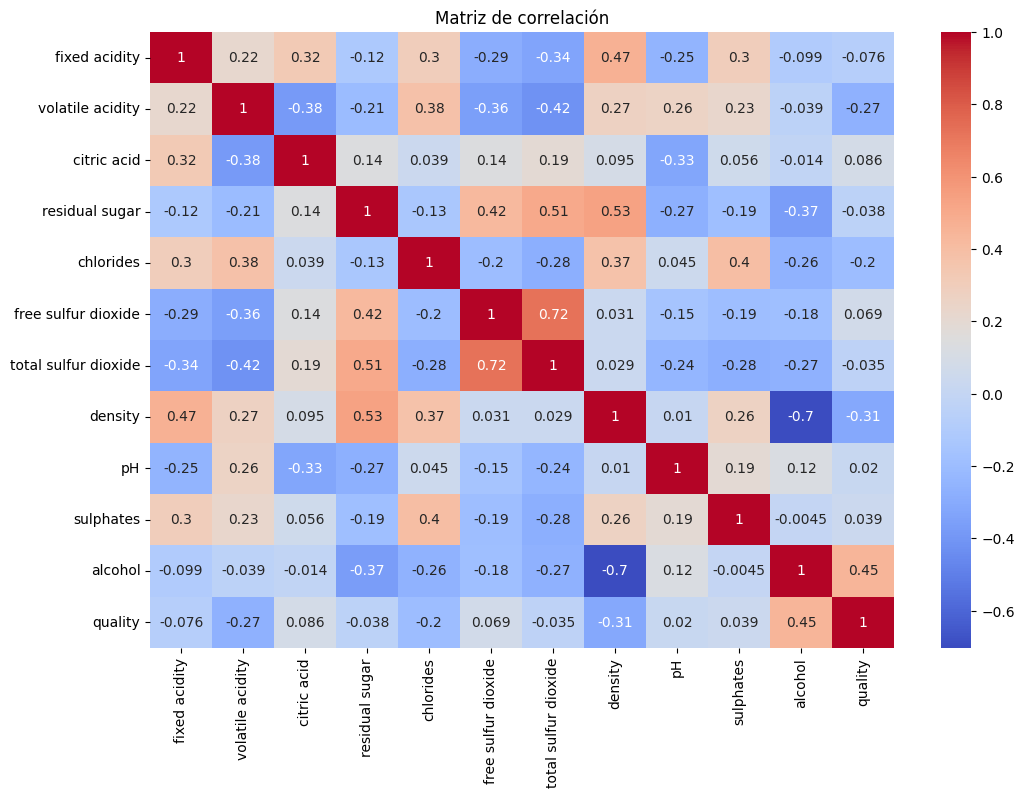

In [21]:
# Sacamos la Matriz de correlación
correlation_matrix = df_cleaned.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

Mapa de calor de correlaciones
- Confirma que el alcohol tiene la correlación positiva más fuerte con la calidad.
- Densidad y acidez volátil tienen las correlaciones negativas mayores.
- Aún así, decir que las correlaciones no no excesivamente altas en entre ninguna caracteristica y la calidad del vino
    

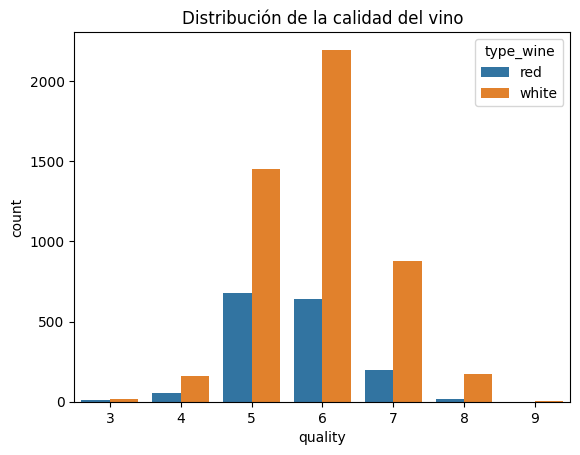

type_wine
red      5.634712
white    5.879836
Name: quality, dtype: float64

In [22]:
# Visualización de la distribución de la calidad entre los dos tipos de vino
sns.countplot(x='quality', hue='type_wine', data=df_cleaned)
plt.title('Distribución de la calidad del vino')
plt.show()

# Calidad media por cada tipo de vino
quality_mean_type = df_cleaned.groupby("type_wine").mean(numeric_only=True)
quality_mean_type["quality"]

En la muestra se ve una cantidad mayor de vinos blancos frente a tintos.
- Vino tinto: Calidad media de 5.64
- Vino blanco: Calidad media de 5.88
- Esto sugiere que, en promedio, los vinos blancos tienden a tener una calidad ligeramente mayor que los tintos.

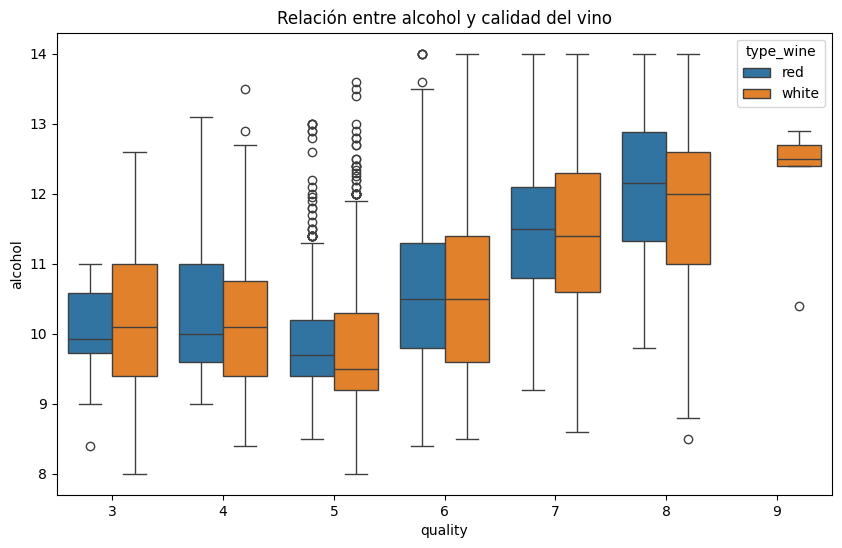

In [23]:
# Visualización de la relación entre alcohol y calidad
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='alcohol', hue='type_wine', data=df_cleaned)
plt.title('Relación entre alcohol y calidad del vino')
plt.show()


Relación entre calidad y alcohol
- Los vinos con mayor contenido de alcohol tienden a tener una calidad más alta.

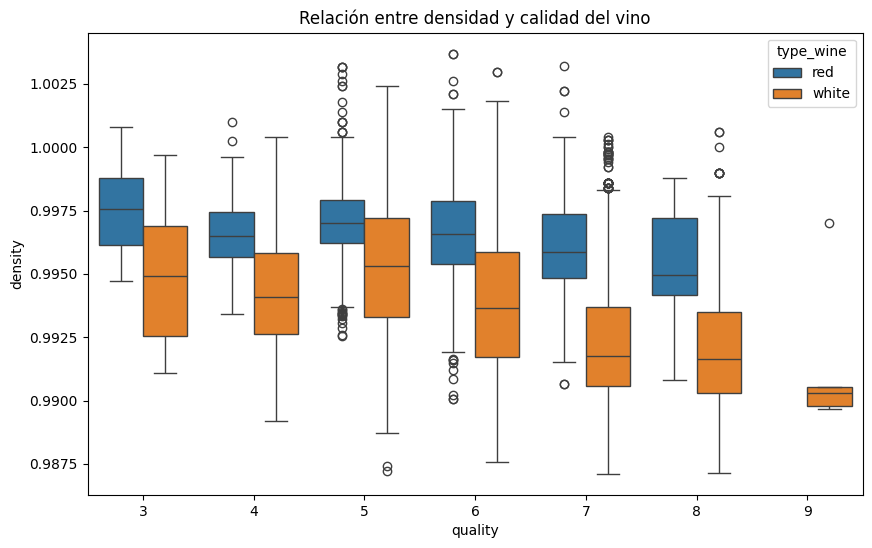

In [24]:
# Visualización de la relación entre densidad y calidad
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='density', hue='type_wine', data=df_cleaned)
plt.title('Relación entre densidad y calidad del vino')
plt.show()


Se ve que a mayor calidad del vino la densidad tiende a disminuir, con mayor notoriedad en los blancos

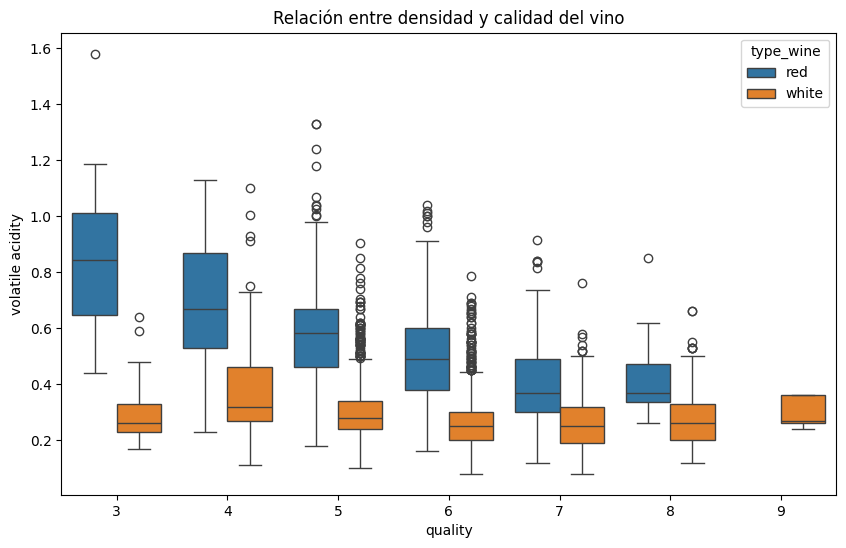

In [25]:
# Visualización de la relación entre acidez volátil y calidad
plt.figure(figsize=(10, 6))
sns.boxplot(x='quality', y='volatile acidity', hue='type_wine', data=df_cleaned)
plt.title('Relación entre densidad y calidad del vino')
plt.show()


Relación entre calidad y acidez volátil
- A mayor acidez volátil la calidad va descendiendo, sobre todo en los vinos tintos

### En conclusión, los vinos con mayor alcohol, y menor densidad y acidez volátil, tienden a ser vinos de mejor calidad. Y entre vinos tintos o blancos, ganan ligeramente los blancos.